# Major Assignment 4

## 4. Student Performance Prediction using Decision Tree

/var/folders/5x/z13d44gx20g46bp4qnq6n42w0000gn/T/ipykernel_44122/2798560782.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


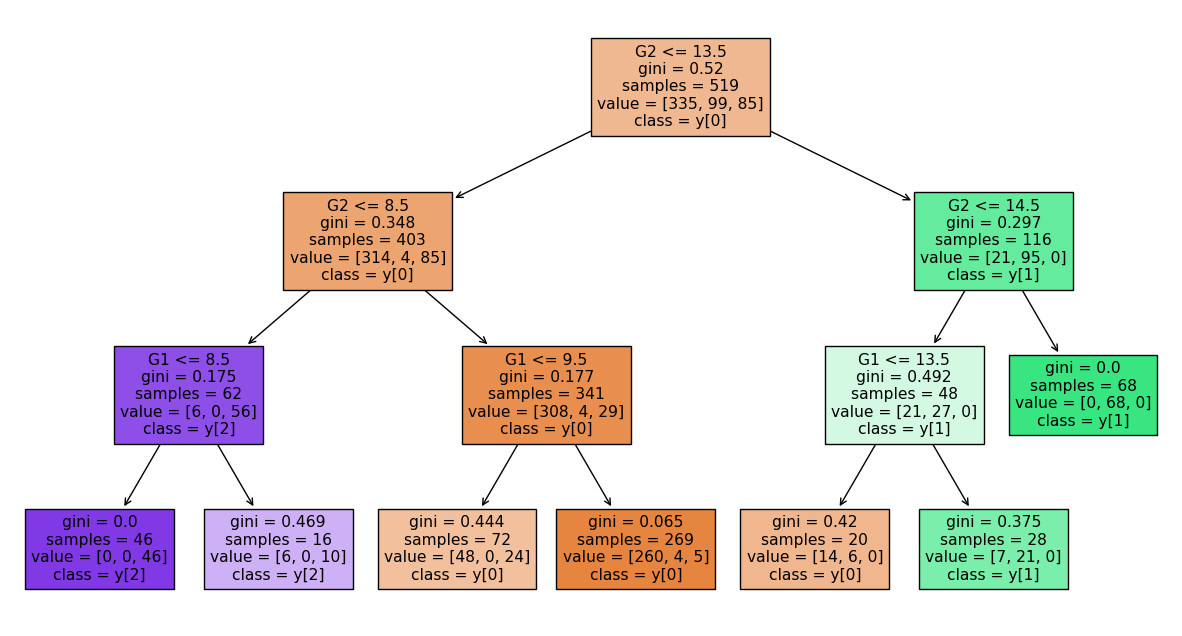

Accuracy: 0.9307692307692308

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95        83
           1       0.91      1.00      0.96        32
           2       0.91      0.67      0.77        15

    accuracy                           0.93       130
   macro avg       0.92      0.87      0.89       130
weighted avg       0.93      0.93      0.93       130

Confusion Matrix:
 [[79  3  1]
 [ 0 32  0]
 [ 5  0 10]]


In [ ]:
# Student Performance Prediction using Decision Tree

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the student performance dataset
data = pd.read_csv("student_performance.csv", sep=';')

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Convert final grade (G3) into performance categories
# 0–9 : Poor, 10–14 : Average, 15–20 : Good
def performance_category(grade):
    if grade < 10:
        return "Poor"
    elif grade < 15:
        return "Average"
    else:
        return "Good"

data['Performance'] = data['G3'].apply(performance_category)

# Drop G3 since it is now converted to Performance
data.drop('G3', axis=1, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Separate features (X) and target variable (y)
X = data.drop('Performance', axis=1)
y = data['Performance']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier with pruning
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=10,
    random_state=42
)
dt_model.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=True, filled=True)
plt.show()

# Predict on test data
y_pred = dt_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))